In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

from linearRegCostFunction import linearRegCostFunction
from trainLinearReg import trainLinearReg
from learningCurve import learningCurve
from polyFeatures import polyFeatures
from featureNormalize import featureNormalize
from plotFit import plotFit
from validationCurve import validationCurve

## Machine Learning Online Class
#  Exercise 5 | Regularized Linear Regression and Bias-Variance
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     linearRegCostFunction.m
#     learningCurve.m
#     validationCurve.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#


Loading and Visualizing Data ...


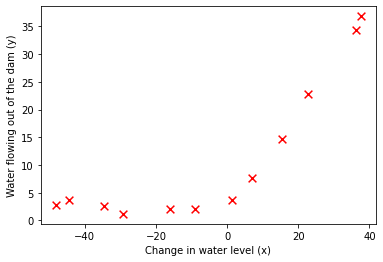

In [2]:
%matplotlib inline 
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

# Load Training Data
print ('Loading and Visualizing Data ...')

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
data = scipy.io.loadmat('ex5data1.mat')

# m = Number of examples
X = data['X'][:, 0]
y = data['y'][:, 0]
Xval = data['Xval'][:, 0]
yval = data['yval'][:, 0]
Xtest = data['Xtest'][:, 0]

m = X.size

# Plot training data
plt.figure()
plt.scatter(X, y, marker='x', s=60, color='r', lw=1.5)
plt.ylabel('Water flowing out of the dam (y)')            # Set the y-axis label
plt.xlabel('Change in water level (x)')     # Set the x-axis label
plt.show()


In [3]:
## =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear 
#  regression. 
#

theta = np.array([1, 1])
res = linearRegCostFunction(np.column_stack((np.ones(m), X)), y, theta, 1)
J = res[0]
grad = res[1]
print ('Cost at theta = [1  1]: %f \n(this value should be about 303.993192)\n' % J) 
print ('Gradient at theta = [1  1]:  [%f %f] \n(this value should be about [-15.303016 598.250744])\n' %(grad[0], grad[1]))

Cost at theta = [1  1]: 303.993192 
(this value should be about 303.993192)

Gradient at theta = [1  1]:  [-15.303016 598.250744] 
(this value should be about [-15.303016 598.250744])



Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 3
         Function evaluations: 21
         Gradient evaluations: 7


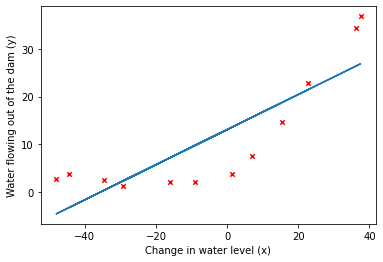

In [4]:
## =========== Part 3: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train 
#  regularized linear regression.
# 
#  Write Up Note: The data is non-linear, so this will not give a great 
#                 fit.
#

#  Train linear regression with Lambda = 0
Lambda = 0
theta = trainLinearReg(np.column_stack((np.ones(m), X)), y, 1)

#  Plot fit over the data
plt.figure()
plt.scatter(X, y, marker='x', s=20, color='r', lw=1.5)
plt.ylabel('Water flowing out of the dam (y)')            # Set the y-axis label
plt.xlabel('Change in water level (x)')     # Set the x-axis label
plt.plot(X, np.column_stack((np.ones(m), X)).dot(theta))




Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 18
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 48
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 42
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 17
         Function evaluations: 84
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 23
         Function evaluations: 120
      

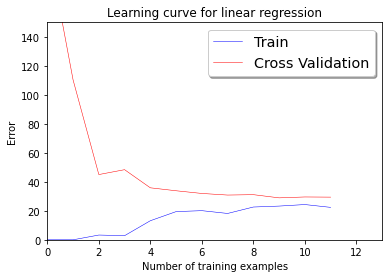

In [5]:
## =========== Part 4: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function. 
#
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- slide 8 in ML-advice.pdf 
#

Lambda = 0
error_train, error_val = learningCurve(np.column_stack((np.ones(m), X)), y,
                                       np.column_stack((np.ones(Xval.shape[0]), Xval)), yval, Lambda)
plt.figure()
plt.plot(range(m), error_train, color='b', lw=0.5, label='Train')
plt.plot(range(m), error_val, color='r', lw=0.5, label='Cross Validation')
plt.title('Learning curve for linear regression')
plt.legend()
plt.xlabel('Number of training examples')
plt.ylabel('Error')

plt.xlim(0, 13)
plt.ylim(0, 150)
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)

print ('Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print ('  \t%d\t\t%f\t%f' % (i, error_train[i], error_val[i]))



In [6]:
## =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers
#

p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.column_stack((np.ones(m), X_poly))                   # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.column_stack((np.ones(X_poly_test.shape[0]), X_poly_test))        # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.column_stack((np.ones(X_poly_test.shape[0]), X_poly_val))           # Add Ones

print ('Normalized Training Example 1:')
print (X_poly[0, :])


Normalized Training Example 1:
[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


         Current function value: 0.533125
         Iterations: 10
         Function evaluations: 110
         Gradient evaluations: 11


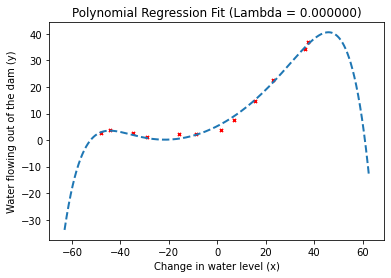

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 40
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 60
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 220
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 200
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 89
         Function evaluations: 1590
         Gradient evaluations: 159
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 92
         Function evaluations: 1790


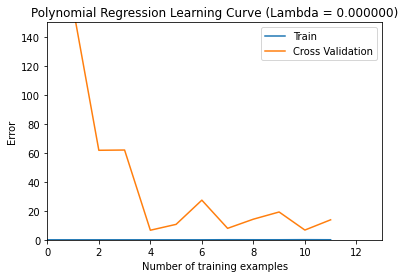

Polynomial Regression (Lambda = 0.000000)


# Training Examples	Train Error	Cross Validation Error
  	0		0.000000	160.721900
  	1		0.000000	160.121511
  	2		0.000000	61.755001
  	3		0.000000	61.929426
  	4		0.000000	6.598108
  	5		0.000000	10.654680
  	6		0.000018	27.347177
  	7		0.065517	7.908181
  	8		0.041291	14.218747
  	9		0.040473	19.184424
  	10		0.101130	6.726243
  	11		0.047011	13.788493


In [7]:
## =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of Lambda. The code below runs polynomial regression with 
#  Lambda = 0. You should try running the code with different values of
#  Lambda to see how the fit and learning curve change.
#

Lambda = 0
theta = trainLinearReg(X_poly, y, Lambda, method='BFGS', maxiter=10)

# Plot training data and fit
plt.figure()
plt.scatter(X, y, marker='x', s=10, color='r', lw=1.5)

plotFit(min(X), max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')            # Set the y-axis label
plt.ylabel('Water flowing out of the dam (y)')     # Set the x-axis label
# plt.plot(X, np.column_stack((np.ones(m), X)).dot(theta), marker='_',  lw=2.0)
plt.title('Polynomial Regression Fit (Lambda = %f)' % Lambda)
plt.show()
plt.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)
plt.plot(range(m), error_train, label='Train')
plt.plot(range(m), error_val, label='Cross Validation')
plt.title('Polynomial Regression Learning Curve (Lambda = %f)' % Lambda)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0, 13)
plt.ylim(0, 150)
plt.legend()
plt.show()
print ('Polynomial Regression (Lambda = %f)\n\n' % Lambda)
print ('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print ('  \t%d\t\t%f\t%f' % (i, error_train[i], error_val[i]))



         Current function value: 0.047011
         Iterations: 200
         Function evaluations: 3850
         Gradient evaluations: 385
         Current function value: 0.177917
         Iterations: 200
         Function evaluations: 3770
         Gradient evaluations: 377
         Current function value: 0.249944
         Iterations: 200
         Function evaluations: 3880
         Gradient evaluations: 388
Optimization terminated successfully.
         Current function value: 0.385063
         Iterations: 158
         Function evaluations: 2950
         Gradient evaluations: 295
Optimization terminated successfully.
         Current function value: 0.669275
         Iterations: 142
         Function evaluations: 2490
         Gradient evaluations: 249
Optimization terminated successfully.
         Current function value: 1.443470
         Iterations: 64
         Function evaluations: 1230
         Gradient evaluations: 123
Optimization terminated successfully.
         Current func

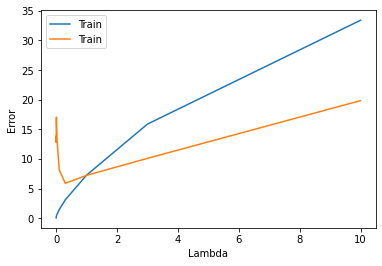

Lambda		Train Error	Validation Error
 0.000000	0.047011	13.788493
 0.001000	0.177917	12.777509
 0.003000	0.249944	16.529880
 0.010000	0.385063	17.043191
 0.030000	0.669275	13.051981
 0.100000	1.443470	8.149642
 0.300000	3.101591	5.882428
 1.000000	7.268148	7.227499
 3.000000	15.867688	10.089379
 10.000000	33.372203	19.819786


In [10]:
## =========== Part 8: Validation for Selecting Lambda =============
#  You will now implement validationCurve to test various values of 
#  Lambda on a validation set. You will then use this to select the
#  "best" Lambda value.
#

Lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)
plt.figure()
plt.plot(Lambda_vec, error_train, label='Train')
plt.plot(Lambda_vec, error_val, label='Train')

plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.show()
print ('Lambda\t\tTrain Error\tValidation Error')
for i in range(Lambda_vec.size):
    print (' %f\t%f\t%f' % (Lambda_vec[i], error_train[i], error_val[i]))

